https://cienciadedatos.net/documentos/py49-modelling-time-series-trend-with-tree-based-models.html#Libraries

https://cienciadedatos.net/documentos/py44-multi-series-forecasting-skforecast.html

In [7]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# Modelling and Forecasting
# ==============================================================================
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error

c:\Users\usuario\anaconda3\envs\TFM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
# Libraries
# ======================================================================================
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  HistGradientBoostingRegressor
from lightgbm import LGBMRegressor

from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries

In [8]:
data = pd.read_csv('C:\\Users\\usuario\Desktop\TFM\Forecasting_FinancialTS\data\preparation\df_no24.csv')

In [14]:
# Split data into train-validation-test
# ======================================================================================
end_train = '2019-01-01'
end_val = '2022-01-01'

data_train = data.loc[:end_train, :].copy()
data_val   = data.loc[end_train:end_val, :].copy()
data_test  = data.loc[end_val:, :].copy()

print(f"Train dates      : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Train dates      : 0 --- 2019  (n=2020)
Validation dates : 2020 --- 2022  (n=3)
Test dates       : 2023 --- 2484  (n=462)


C:\Users\usuario\AppData\Local\Temp\ipykernel_18760\455936596.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.iloc[:, :9].plot(


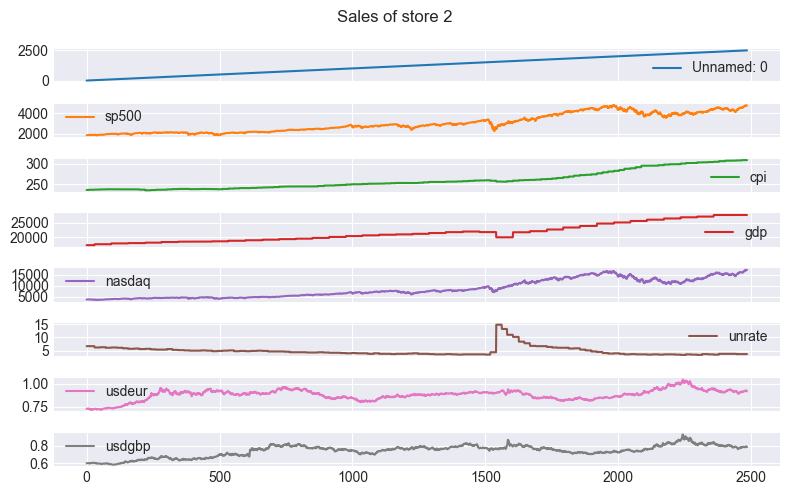

In [21]:
# Plot time series
# ======================================================================================
fig, ax = plt.subplots(figsize=(8, 5))
data.iloc[:, :9].plot(
    legend   = True,
    subplots = True, 
    sharex   = True,
    title    = 'Variables',
    ax       = ax, 
)
fig.tight_layout();

ValueError: could not convert string to float: '2014-02-18'

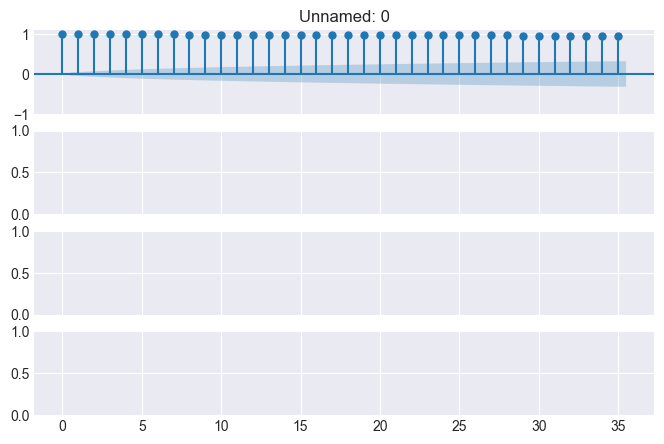

In [24]:
# Autocorrelation plot
# ======================================================================================
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 5), sharex=True)
axes = axes.flat
for i, col in enumerate(data.columns[:4]):
    plot_acf(data[col], ax=axes[i], lags=7*5)
    axes[i].set_ylim(-1, 1.1)
    axes[i].set_title(f'{col}')
fig.tight_layout()
plt.show()